# **PREDICTING HEART DISEASE FROM CLINICAL AND LABORATORIAL DATA USING KNN**

## **INTRODUCTION**

Importations:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

Loading the dataset:

In [ ]:
data = pd.read_csv("../heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape:

In [ ]:
data.shape

(303, 14)

Variables types:

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **EDA AND PRE-PROCESSING**




### Outcome variable count:

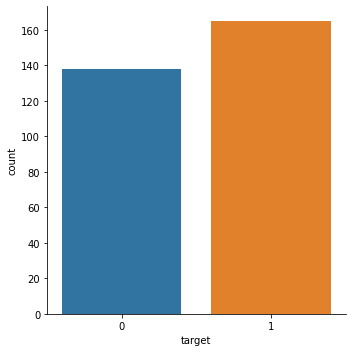

In [ ]:
sns.catplot(x="target", kind='count', data=data)

### Categorical predictive variables:

sex:

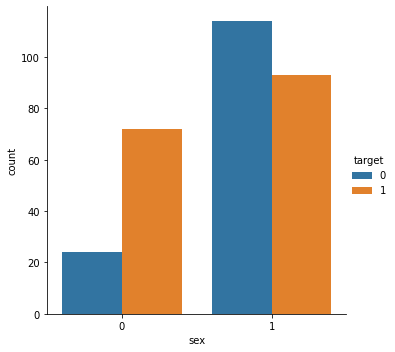

In [ ]:
sns.catplot(x='sex',kind='count', hue='target', data=data)

cp:

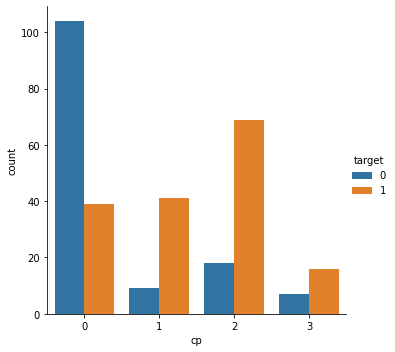

In [ ]:
sns.catplot(x='cp',kind='count', hue='target', data=data)

fbs:

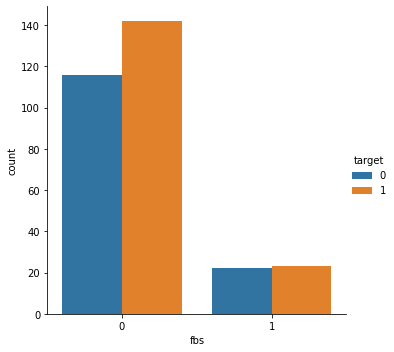

In [ ]:
sns.catplot(x='fbs',kind='count', hue='target', data=data)

restecg:

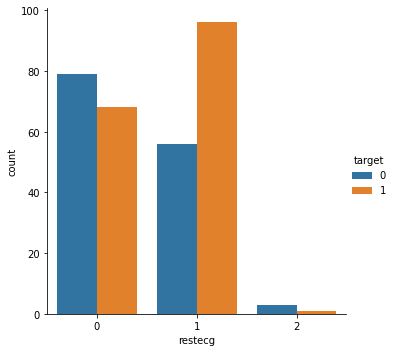

In [ ]:
sns.catplot(x='restecg',kind='count', hue='target', data=data)

exang:

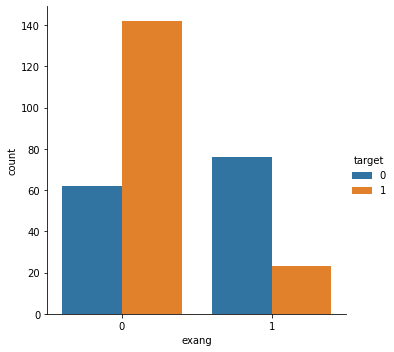

In [ ]:
sns.catplot(x='exang',kind='count', hue='target', data=data)

slope:

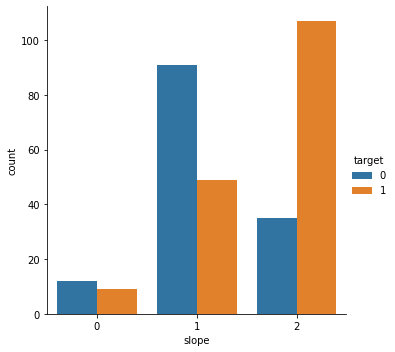

In [ ]:
sns.catplot(x='slope',kind='count', hue='target', data=data)

ca:

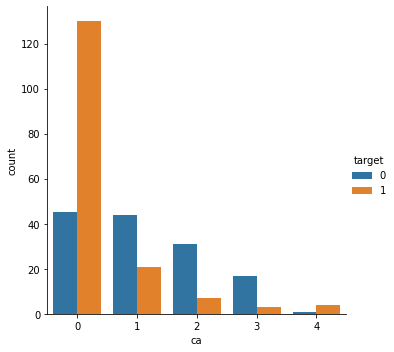

In [ ]:
sns.catplot(x='ca',kind='count', hue='target', data=data)

thal:

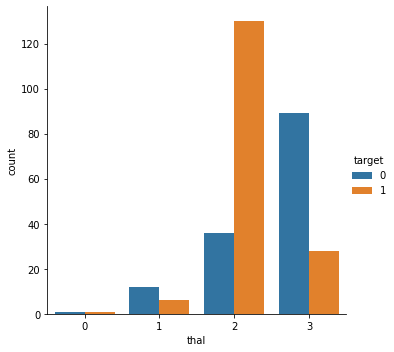

In [ ]:
sns.catplot(x='thal',kind='count', hue='target', data=data)

### Distributional predictive variables:




In [ ]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


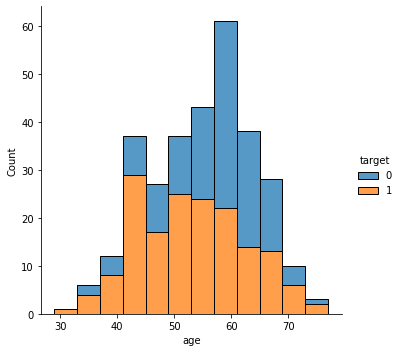

In [ ]:
sns.displot(x='age', multiple='stack', hue= 'target', data= data)

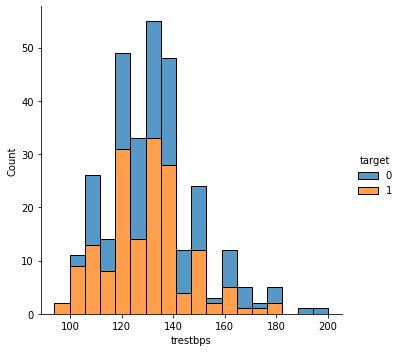

In [ ]:
sns.displot(x='trestbps', multiple='stack', hue= 'target', data= data)

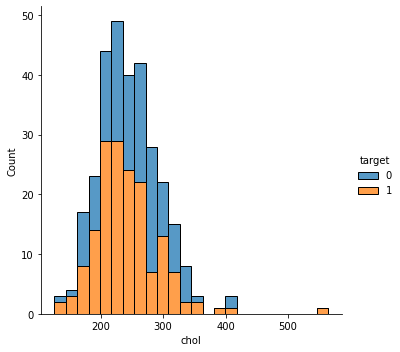

In [ ]:
sns.displot(x='chol', multiple='stack', hue= 'target', data= data)

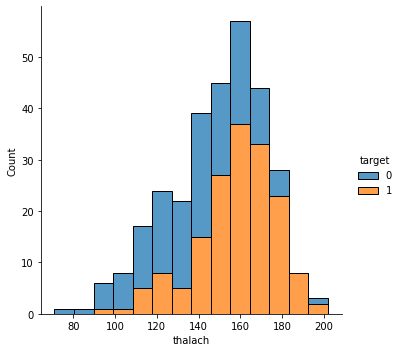

In [ ]:
sns.displot(x='thalach', multiple='stack', hue= 'target', data= data)

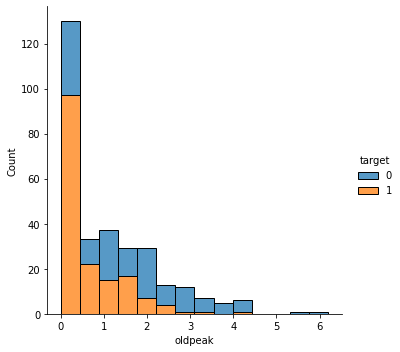

In [ ]:
sns.displot(x='oldpeak', multiple='stack', hue= 'target', data= data)

## **SPLITTING AND PRE-PROCESSING:**

Defining x_train, x_test, y_train and y_test:

In [ ]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

Scaling the data:

In [ ]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## **TRAINING THE MODEL:**

Parameters for grid search:

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance']}

Fiting training data and grid searching:

In [ ]:
grid = GridSearchCV(knn, parameters,cv=4, scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Displayng best parameters:

In [ ]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

Picking the best model:

In [ ]:
model=grid.best_estimator_

## **EVALUATING THE MODEL:**

Model score on test data:

In [ ]:
model.score(x_test,y_test)

0.9016393442622951

Confusion matrix:

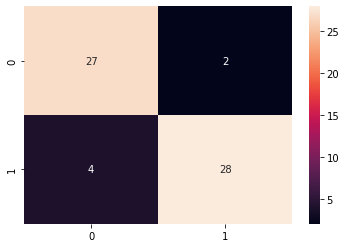

In [ ]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

Calculating sensitivity, specificity, PPV and NPV:

In [ ]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = (TP / (TP + FN) )*100
specificity =  (TN / (TN + FP) )*100
ppv = (TP / (TP + FP) )*100
npv = (TN/ (TN + FN) )*100


Printing sensitivity, specificity, PPV and NPV:

In [ ]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


AUC score:

In [ ]:
probs = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.9154094827586208


ROC curve:

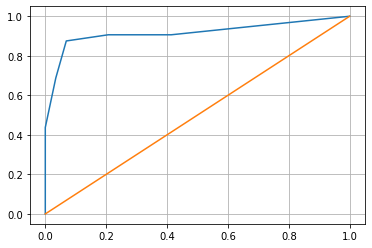

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()